In [142]:
import os
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [143]:
pd.set_option('display.max_columns', None)

In [144]:
pd.set_option('display.max_rows', None)

In [145]:
# Importando a base
df_base = pd.read_csv('Mens_VolleyballPlusLiga_2028_2023/Mens-Volleyball-PlusLiga-2008-2023.csv')

# Convertendo para Data
df_base['Date'] = pd.to_datetime(df_base['Date'], format='%d.%m.%Y, %H:%M', errors='coerce')
df_base['Ano'] = pd.to_datetime(df_base['Date']).dt.year

# Filtrando a base para ter dados a partir de 2013
df_base = df_base.loc[df_base['Date'].dt.year >= 2020]

df_base.sort_values('Date', ascending=True, inplace=True)
df_base.reset_index(inplace=True, drop=True)
df_base['Match_ID'] = df_base.index
df_base.head()

,Date,Team_1,Team_2,T1_Score,T2_Score,T1_Sum,T1_BP,T1_Ratio,T1_Srv_Sum,T1_Srv_Err,T1_Srv_Ace,T1_Srv_Eff,T1_Rec_Sum,T1_Rec_Err,T1_Rec_Pos,T1_Rec_Perf,T1_Att_Sum,T1_Att_Err,T1_Att_Blk,T1_Att_Kill,T1_Att_Kill_Perc,T1_Att_Eff,T1_Blk_Sum,T1_Blk_As,T2_Sum,T2_BP,T2_Ratio,T2_Srv_Sum,T2_Srv_Err,T2_Srv_Ace,T2_Srv_Eff,T2_Rec_Sum,T2_Rec_Err,T2_Rec_Pos,T2_Rec_Perf,T2_Att_Sum,T2_Att_Err,T2_Att_Blk,T2_Att_Kill,T2_Att_Kill_Perc,T2_Att_Eff,T2_Blk_Sum,T2_Blk_As,Winner,Ano,Match_ID
0,2020-09-11 17:30:00,Stal Nysa,ZAKSA Kędzierzyn-Koźle,0,3,35.0,6.0,-1.0,50.0,12,0.0,-22%,63.0,7.0,42%,15%,74,9.0,8.0,30.0,40%,17%,5.0,5,49,23,32,73,10,7,1%,38,0,47%,15%,67,2,5,34,50%,40%,8,7,1,2020,0
1,2020-09-12 14:45:00,Czarni Radom,AZS Olsztyn,3,2,72.0,28.0,31.0,107.0,26,8.0,-14%,76.0,5.0,47%,19%,103,3.0,7.0,55.0,53%,43%,9.0,10,68,27,17,101,25,5,-16%,81,8,59%,32%,110,9,9,56,50%,34%,7,17,0,2020,1
2,2020-09-12 17:30:00,Cuprum Lubin,PGE Skra Bełchatów,1,3,70.0,20.0,30.0,100.0,21,4.0,-14%,80.0,4.0,36%,20%,115,8.0,7.0,59.0,51%,38%,7.0,9,71,20,33,100,20,4,-11%,79,4,48%,30%,113,7,7,60,53%,40%,7,11,1,2020,2
3,2020-09-12 20:30:00,Ślepsk Malow Suwałki,GKS Katowice,0,3,47.0,12.0,19.0,67.0,9,3.0,-7%,66.0,5.0,56%,18%,85,4.0,10.0,38.0,44%,28%,6.0,5,62,24,37,75,9,5,-4%,58,3,48%,22%,90,7,6,47,52%,37%,10,12,1,2020,3
4,2020-09-13 17:30:00,MKS Będzin,Projekt Warszawa,1,3,62.0,17.0,17.0,84.0,16,5.0,-11%,86.0,8.0,50%,23%,118,12.0,9.0,52.0,44%,26%,5.0,11,66,26,36,95,9,8,1%,68,5,61%,38%,98,11,5,49,50%,33%,9,14,1,2020,4


In [146]:
print(f'Numero de partidas jogadas: {len(df_base)}')

Numero de partidas jogadas: 628


In [147]:
# Tirando os % das colunas de percentual
perc_cols = [
    'T1_Srv_Eff', 'T1_Rec_Pos', 'T1_Rec_Perf', 'T1_Att_Kill_Perc', 
    'T1_Att_Eff', 'T1_Att_Sum', 'T2_Srv_Eff', 'T2_Rec_Pos', 'T2_Rec_Perf', 
    'T2_Att_Kill_Perc', 'T2_Att_Eff', 'T2_Att_Sum'
]
for col in perc_cols:
    df_base[col] = pd.to_numeric(df_base[col].str.replace('%', ''))

In [148]:
# Ajustando virgulas por pontos nas colunas de float
float_cols = ['T1_Srv_Err', 'T1_Blk_As', 'T2_Srv_Err', 'T2_Blk_As']
for col in float_cols:
    df_base[col] = pd.to_numeric(df_base[col].str.replace(',', '.'))

In [149]:
time1_df = pd.concat([df_base[['Match_ID', 'Date', 'Team_1', 'T1_Score', 'Ano']], 
                      df_base.loc[:, 'T1_Sum': 'T1_Blk_As']], axis=1)

time2_df = pd.concat([df_base[['Match_ID', 'Date', 'Team_2', 'T2_Score', 'Ano']], 
                      df_base.loc[:, 'T2_Sum': 'T2_Blk_As']], axis=1)

time1_df['Oponente'] = df_base['Team_2']

time2_df['Oponente'] = df_base['Team_1']

In [150]:
time1_df.columns

Index(['Match_ID', 'Date', 'Team_1', 'T1_Score', 'Ano', 'T1_Sum', 'T1_BP',
       'T1_Ratio', 'T1_Srv_Sum', 'T1_Srv_Err', 'T1_Srv_Ace', 'T1_Srv_Eff',
       'T1_Rec_Sum', 'T1_Rec_Err', 'T1_Rec_Pos', 'T1_Rec_Perf', 'T1_Att_Sum',
       'T1_Att_Err', 'T1_Att_Blk', 'T1_Att_Kill', 'T1_Att_Kill_Perc',
       'T1_Att_Eff', 'T1_Blk_Sum', 'T1_Blk_As', 'Oponente'],
      dtype='object')

In [151]:
time2_df.columns

Index(['Match_ID', 'Date', 'Team_2', 'T2_Score', 'Ano', 'T2_Sum', 'T2_BP',
       'T2_Ratio', 'T2_Srv_Sum', 'T2_Srv_Err', 'T2_Srv_Ace', 'T2_Srv_Eff',
       'T2_Rec_Sum', 'T2_Rec_Err', 'T2_Rec_Pos', 'T2_Rec_Perf', 'T2_Att_Sum',
       'T2_Att_Err', 'T2_Att_Blk', 'T2_Att_Kill', 'T2_Att_Kill_Perc',
       'T2_Att_Eff', 'T2_Blk_Sum', 'T2_Blk_As', 'Oponente'],
      dtype='object')

In [152]:
# Combinando os datasets para que cada linha seja para a performance de um time
concatenacao_colunas = {x: y for x, y in zip(time2_df.columns, time1_df.columns)}
time_perf_df = pd.concat(
    [
        time1_df, 
        time2_df.rename(columns=concatenacao_colunas)
    ])
time_perf_df.columns = time_perf_df.columns.str.replace('T1_', '')
time_perf_df.head()

,Match_ID,Date,Team_1,Score,Ano,Sum,BP,Ratio,Srv_Sum,Srv_Err,Srv_Ace,Srv_Eff,Rec_Sum,Rec_Err,Rec_Pos,Rec_Perf,Att_Sum,Att_Err,Att_Blk,Att_Kill,Att_Kill_Perc,Att_Eff,Blk_Sum,Blk_As,Oponente
0,0,2020-09-11 17:30:00,Stal Nysa,0,2020,35.0,6.0,-1.0,50.0,12,0.0,-22,63.0,7.0,42,15,74,9.0,8.0,30.0,40,17,5.0,5,ZAKSA Kędzierzyn-Koźle
1,1,2020-09-12 14:45:00,Czarni Radom,3,2020,72.0,28.0,31.0,107.0,26,8.0,-14,76.0,5.0,47,19,103,3.0,7.0,55.0,53,43,9.0,10,AZS Olsztyn
2,2,2020-09-12 17:30:00,Cuprum Lubin,1,2020,70.0,20.0,30.0,100.0,21,4.0,-14,80.0,4.0,36,20,115,8.0,7.0,59.0,51,38,7.0,9,PGE Skra Bełchatów
3,3,2020-09-12 20:30:00,Ślepsk Malow Suwałki,0,2020,47.0,12.0,19.0,67.0,9,3.0,-7,66.0,5.0,56,18,85,4.0,10.0,38.0,44,28,6.0,5,GKS Katowice
4,4,2020-09-13 17:30:00,MKS Będzin,1,2020,62.0,17.0,17.0,84.0,16,5.0,-11,86.0,8.0,50,23,118,12.0,9.0,52.0,44,26,5.0,11,Projekt Warszawa


In [153]:
df = time_perf_df.merge(
        time_perf_df, 
        how='inner', 
        left_on=['Match_ID', 'Oponente'], 
        right_on=['Match_ID', 'Team_1'],
        suffixes=('', '_T2')
)

df.drop(['Date_T2', 'Team_1_T2', 'Ano_T2', 'Oponente_T2'], axis=1, inplace=True)
df.head()

,Match_ID,Date,Team_1,Score,Ano,Sum,BP,Ratio,Srv_Sum,Srv_Err,Srv_Ace,Srv_Eff,Rec_Sum,Rec_Err,Rec_Pos,Rec_Perf,Att_Sum,Att_Err,Att_Blk,Att_Kill,Att_Kill_Perc,Att_Eff,Blk_Sum,Blk_As,Oponente,Score_T2,Sum_T2,BP_T2,Ratio_T2,Srv_Sum_T2,Srv_Err_T2,Srv_Ace_T2,Srv_Eff_T2,Rec_Sum_T2,Rec_Err_T2,Rec_Pos_T2,Rec_Perf_T2,Att_Sum_T2,Att_Err_T2,Att_Blk_T2,Att_Kill_T2,Att_Kill_Perc_T2,Att_Eff_T2,Blk_Sum_T2,Blk_As_T2
0,0,2020-09-11 17:30:00,Stal Nysa,0,2020,35.0,6.0,-1.0,50.0,12,0.0,-22,63.0,7.0,42,15,74,9.0,8.0,30.0,40,17,5.0,5,ZAKSA Kędzierzyn-Koźle,3,49.0,23.0,32.0,73.0,10,7.0,1,38.0,0.0,47,15,67,2.0,5.0,34.0,50,40,8.0,7
1,1,2020-09-12 14:45:00,Czarni Radom,3,2020,72.0,28.0,31.0,107.0,26,8.0,-14,76.0,5.0,47,19,103,3.0,7.0,55.0,53,43,9.0,10,AZS Olsztyn,2,68.0,27.0,17.0,101.0,25,5.0,-16,81.0,8.0,59,32,110,9.0,9.0,56.0,50,34,7.0,17
2,2,2020-09-12 17:30:00,Cuprum Lubin,1,2020,70.0,20.0,30.0,100.0,21,4.0,-14,80.0,4.0,36,20,115,8.0,7.0,59.0,51,38,7.0,9,PGE Skra Bełchatów,3,71.0,20.0,33.0,100.0,20,4.0,-11,79.0,4.0,48,30,113,7.0,7.0,60.0,53,40,7.0,11
3,3,2020-09-12 20:30:00,Ślepsk Malow Suwałki,0,2020,47.0,12.0,19.0,67.0,9,3.0,-7,66.0,5.0,56,18,85,4.0,10.0,38.0,44,28,6.0,5,GKS Katowice,3,62.0,24.0,37.0,75.0,9,5.0,-4,58.0,3.0,48,22,90,7.0,6.0,47.0,52,37,10.0,12
4,4,2020-09-13 17:30:00,MKS Będzin,1,2020,62.0,17.0,17.0,84.0,16,5.0,-11,86.0,8.0,50,23,118,12.0,9.0,52.0,44,26,5.0,11,Projekt Warszawa,3,66.0,26.0,36.0,95.0,9,8.0,1,68.0,5.0,61,38,98,11.0,5.0,49.0,50,33,9.0,14


In [154]:
print(f'Numero de partidas jogadas: {len(df)}')

Numero de partidas jogadas: 1256


In [155]:
df['Vencedor'] = np.where(df['Score'] < 3, 0, 1)
df['SetsTotais'] = df['Score'] + df['Score_T2']
df['DiffSets'] = df['Score'] - df['Score_T2']
df.sort_values('Match_ID').head()

,Match_ID,Date,Team_1,Score,Ano,Sum,BP,Ratio,Srv_Sum,Srv_Err,Srv_Ace,Srv_Eff,Rec_Sum,Rec_Err,Rec_Pos,Rec_Perf,Att_Sum,Att_Err,Att_Blk,Att_Kill,Att_Kill_Perc,Att_Eff,Blk_Sum,Blk_As,Oponente,Score_T2,Sum_T2,BP_T2,Ratio_T2,Srv_Sum_T2,Srv_Err_T2,Srv_Ace_T2,Srv_Eff_T2,Rec_Sum_T2,Rec_Err_T2,Rec_Pos_T2,Rec_Perf_T2,Att_Sum_T2,Att_Err_T2,Att_Blk_T2,Att_Kill_T2,Att_Kill_Perc_T2,Att_Eff_T2,Blk_Sum_T2,Blk_As_T2,Vencedor,SetsTotais,DiffSets
0,0,2020-09-11 17:30:00,Stal Nysa,0,2020,35.0,6.0,-1.0,50.0,12,0.0,-22,63.0,7.0,42,15,74,9.0,8.0,30.0,40,17,5.0,5,ZAKSA Kędzierzyn-Koźle,3,49.0,23.0,32.0,73.0,10,7.0,1,38.0,0.0,47,15,67,2.0,5.0,34.0,50,40,8.0,7,0,3,-3
628,0,2020-09-11 17:30:00,ZAKSA Kędzierzyn-Koźle,3,2020,49.0,23.0,32.0,73.0,10,7.0,1,38.0,0.0,47,15,67,2.0,5.0,34.0,50,40,8.0,7,Stal Nysa,0,35.0,6.0,-1.0,50.0,12,0.0,-22,63.0,7.0,42,15,74,9.0,8.0,30.0,40,17,5.0,5,1,3,3
629,1,2020-09-12 14:45:00,AZS Olsztyn,2,2020,68.0,27.0,17.0,101.0,25,5.0,-16,81.0,8.0,59,32,110,9.0,9.0,56.0,50,34,7.0,17,Czarni Radom,3,72.0,28.0,31.0,107.0,26,8.0,-14,76.0,5.0,47,19,103,3.0,7.0,55.0,53,43,9.0,10,0,5,-1
1,1,2020-09-12 14:45:00,Czarni Radom,3,2020,72.0,28.0,31.0,107.0,26,8.0,-14,76.0,5.0,47,19,103,3.0,7.0,55.0,53,43,9.0,10,AZS Olsztyn,2,68.0,27.0,17.0,101.0,25,5.0,-16,81.0,8.0,59,32,110,9.0,9.0,56.0,50,34,7.0,17,1,5,1
2,2,2020-09-12 17:30:00,Cuprum Lubin,1,2020,70.0,20.0,30.0,100.0,21,4.0,-14,80.0,4.0,36,20,115,8.0,7.0,59.0,51,38,7.0,9,PGE Skra Bełchatów,3,71.0,20.0,33.0,100.0,20,4.0,-11,79.0,4.0,48,30,113,7.0,7.0,60.0,53,40,7.0,11,0,4,-2


In [156]:
df_agrupado_ano = df.Ano.value_counts().sort_index()
df_agrupado_ano

2020    220
2021    376
2022    534
2023    126
Name: Ano, dtype: int64

In [157]:
mapeamento_colunas = {
    'Team_1': 'Time',
    'Score': 'Set_T1',
    'Sum': 'PontuacaoFinal_T1', 
    'BP': 'PontosCADoSaque_T1', 
    'Ratio': 'Ratio_T1',
    'Srv_Sum': 'TotalSaques_T1', 
    'Srv_Err': 'TotalSaquesErrados_T1', 
    'Srv_Ace': 'PontosDeAce_T1',
    'Srv_Eff': 'PercEficSaque_T1',  
    'Rec_Sum': 'TotalSaquesRecebidos_T1', 
    'Rec_Err': 'TotalRecepcoesDeSaqueErrados_T1', 
    'Rec_Pos': 'PercSaquesRecebidos_T1',
    'Rec_Perf': 'PercDeSaquesRecebidosPerfeitos_T1',
    'Att_Sum': 'TotalAtaques_T1', 
    'Att_Err': 'TotalAtaquesErrados_T1', 
    'Att_Blk': 'TotalBloqueiosSofridos_T1',  
    'Att_Kill': 'PontosAtaque_T1', # (PontosDeAtaque / TotalAtaques) 
    'Att_Kill_Perc':'PercPontosAtaque_T1',
    'Att_Eff': 'PercEficAtaque_T1', # (PontosDeAtaque - TotalAtaquesBloqueados  / TotalAtaques)?
    'Blk_Sum': 'PontosDeBloqueios_T1', 
    'Blk_As': 'TotalCAPorBloqueio_T1', 
  
    'Score_T2': 'Set_T2',
    'Sum_T2': 'PontuacaoFinal_T2', 
    'BP_T2': 'PontosCADoSaque_T2', 
    'Ratio_T2': 'Ratio_T2',
    'Srv_Sum_T2': 'TotalSaques_T2',
    'Srv_Err_T2': 'TotalSaquesErrados_T2',
    'Srv_Ace_T2': 'PontosDeAce_T2',
    'Srv_Eff_T2': 'PercEficSaque_T2',
    'Rec_Sum_T2': 'TotalSaquesRecebidos_T2', 
    'Rec_Err_T2': 'TotalRecepcoesDeSaqueErrados_T2', 
    'Rec_Pos_T2': 'PercSaquesRecebidos_T2',
    'Rec_Perf_T2': 'PercDeSaquesRecebidosPerfeitos_T2',
    'Att_Sum_T2': 'TotalAtaques_T2', 
    'Att_Err_T2': 'TotalAtaquesErrados_T2', 
    'Att_Blk_T2': 'TotalBloqueiosSofridos_T2', # Eu ataquei e o time me bloqueiou (TotalAtaquesBloqueados)
    'Att_Kill_T2': 'PontosAtaque_T2', 
    'Att_Kill_Perc_T2': 'PercPontosAtaque_T2', 
    'Att_Eff_T2': 'PercEficAtaque_T2', 
    'Blk_Sum_T2': 'PontosDeBloqueios_T2', 
    'Blk_As_T2': 'TotalCAPorBloqueio_T2' # Eu bloqueei e fiz um CA a partir disso.
}
df.rename(columns=mapeamento_colunas, inplace=True)
df.head()

,Match_ID,Date,Time,Set_T1,Ano,PontuacaoFinal_T1,PontosCADoSaque_T1,Ratio_T1,TotalSaques_T1,TotalSaquesErrados_T1,PontosDeAce_T1,PercEficSaque_T1,TotalSaquesRecebidos_T1,TotalRecepcoesDeSaqueErrados_T1,PercSaquesRecebidos_T1,PercDeSaquesRecebidosPerfeitos_T1,TotalAtaques_T1,TotalAtaquesErrados_T1,TotalBloqueiosSofridos_T1,PontosAtaque_T1,PercPontosAtaque_T1,PercEficAtaque_T1,PontosDeBloqueios_T1,TotalCAPorBloqueio_T1,Oponente,Set_T2,PontuacaoFinal_T2,PontosCADoSaque_T2,Ratio_T2,TotalSaques_T2,TotalSaquesErrados_T2,PontosDeAce_T2,PercEficSaque_T2,TotalSaquesRecebidos_T2,TotalRecepcoesDeSaqueErrados_T2,PercSaquesRecebidos_T2,PercDeSaquesRecebidosPerfeitos_T2,TotalAtaques_T2,TotalAtaquesErrados_T2,TotalBloqueiosSofridos_T2,PontosAtaque_T2,PercPontosAtaque_T2,PercEficAtaque_T2,PontosDeBloqueios_T2,TotalCAPorBloqueio_T2,Vencedor,SetsTotais,DiffSets
0,0,2020-09-11 17:30:00,Stal Nysa,0,2020,35.0,6.0,-1.0,50.0,12,0.0,-22,63.0,7.0,42,15,74,9.0,8.0,30.0,40,17,5.0,5,ZAKSA Kędzierzyn-Koźle,3,49.0,23.0,32.0,73.0,10,7.0,1,38.0,0.0,47,15,67,2.0,5.0,34.0,50,40,8.0,7,0,3,-3
1,1,2020-09-12 14:45:00,Czarni Radom,3,2020,72.0,28.0,31.0,107.0,26,8.0,-14,76.0,5.0,47,19,103,3.0,7.0,55.0,53,43,9.0,10,AZS Olsztyn,2,68.0,27.0,17.0,101.0,25,5.0,-16,81.0,8.0,59,32,110,9.0,9.0,56.0,50,34,7.0,17,1,5,1
2,2,2020-09-12 17:30:00,Cuprum Lubin,1,2020,70.0,20.0,30.0,100.0,21,4.0,-14,80.0,4.0,36,20,115,8.0,7.0,59.0,51,38,7.0,9,PGE Skra Bełchatów,3,71.0,20.0,33.0,100.0,20,4.0,-11,79.0,4.0,48,30,113,7.0,7.0,60.0,53,40,7.0,11,0,4,-2
3,3,2020-09-12 20:30:00,Ślepsk Malow Suwałki,0,2020,47.0,12.0,19.0,67.0,9,3.0,-7,66.0,5.0,56,18,85,4.0,10.0,38.0,44,28,6.0,5,GKS Katowice,3,62.0,24.0,37.0,75.0,9,5.0,-4,58.0,3.0,48,22,90,7.0,6.0,47.0,52,37,10.0,12,0,3,-3
4,4,2020-09-13 17:30:00,MKS Będzin,1,2020,62.0,17.0,17.0,84.0,16,5.0,-11,86.0,8.0,50,23,118,12.0,9.0,52.0,44,26,5.0,11,Projekt Warszawa,3,66.0,26.0,36.0,95.0,9,8.0,1,68.0,5.0,61,38,98,11.0,5.0,49.0,50,33,9.0,14,0,4,-2


In [158]:
# Criando as colunas de média e dividindo elas pela coluna de set total para que tenhamos algo mais justo
colunas_selecionadas = df.filter(regex=("^(?!.*Perc)(.*T1|.*T2)")).columns
df[colunas_selecionadas] = df[colunas_selecionadas].astype(float)
set_total = df['SetsTotais']

medias = df[colunas_selecionadas].div(set_total, axis=0)
medias.columns = 'Media' + medias.columns

df = df.join(medias)
df.head()

,Match_ID,Date,Time,Set_T1,Ano,PontuacaoFinal_T1,PontosCADoSaque_T1,Ratio_T1,TotalSaques_T1,TotalSaquesErrados_T1,PontosDeAce_T1,PercEficSaque_T1,TotalSaquesRecebidos_T1,TotalRecepcoesDeSaqueErrados_T1,PercSaquesRecebidos_T1,PercDeSaquesRecebidosPerfeitos_T1,TotalAtaques_T1,TotalAtaquesErrados_T1,TotalBloqueiosSofridos_T1,PontosAtaque_T1,PercPontosAtaque_T1,PercEficAtaque_T1,PontosDeBloqueios_T1,TotalCAPorBloqueio_T1,Oponente,Set_T2,PontuacaoFinal_T2,PontosCADoSaque_T2,Ratio_T2,TotalSaques_T2,TotalSaquesErrados_T2,PontosDeAce_T2,PercEficSaque_T2,TotalSaquesRecebidos_T2,TotalRecepcoesDeSaqueErrados_T2,PercSaquesRecebidos_T2,PercDeSaquesRecebidosPerfeitos_T2,TotalAtaques_T2,TotalAtaquesErrados_T2,TotalBloqueiosSofridos_T2,PontosAtaque_T2,PercPontosAtaque_T2,PercEficAtaque_T2,PontosDeBloqueios_T2,TotalCAPorBloqueio_T2,Vencedor,SetsTotais,DiffSets,MediaSet_T1,MediaPontuacaoFinal_T1,MediaPontosCADoSaque_T1,MediaRatio_T1,MediaTotalSaques_T1,MediaTotalSaquesErrados_T1,MediaPontosDeAce_T1,MediaTotalSaquesRecebidos_T1,MediaTotalRecepcoesDeSaqueErrados_T1,MediaTotalAtaques_T1,MediaTotalAtaquesErrados_T1,MediaTotalBloqueiosSofridos_T1,MediaPontosAtaque_T1,MediaPontosDeBloqueios_T1,MediaTotalCAPorBloqueio_T1,MediaSet_T2,MediaPontuacaoFinal_T2,MediaPontosCADoSaque_T2,MediaRatio_T2,MediaTotalSaques_T2,MediaTotalSaquesErrados_T2,MediaPontosDeAce_T2,MediaTotalSaquesRecebidos_T2,MediaTotalRecepcoesDeSaqueErrados_T2,MediaTotalAtaques_T2,MediaTotalAtaquesErrados_T2,MediaTotalBloqueiosSofridos_T2,MediaPontosAtaque_T2,MediaPontosDeBloqueios_T2,MediaTotalCAPorBloqueio_T2
0,0,2020-09-11 17:30:00,Stal Nysa,0.0,2020,35.0,6.0,-1.0,50.0,12.0,0.0,-22,63.0,7.0,42,15,74.0,9.0,8.0,30.0,40,17,5.0,5.0,ZAKSA Kędzierzyn-Koźle,3.0,49.0,23.0,32.0,73.0,10.0,7.0,1,38.0,0.0,47,15,67.0,2.0,5.0,34.0,50,40,8.0,7.0,0,3,-3,0.00,11.666667,2.00,-0.333333,16.666667,4.00,0.00,21.0,2.333333,24.666667,3.000000,2.666667,10.000000,1.666667,1.666667,1.00,16.333333,7.666667,10.666667,24.333333,3.333333,2.333333,12.666667,0.00,22.333333,0.666667,1.666667,11.333333,2.666667,2.333333
1,1,2020-09-12 14:45:00,Czarni Radom,3.0,2020,72.0,28.0,31.0,107.0,26.0,8.0,-14,76.0,5.0,47,19,103.0,3.0,7.0,55.0,53,43,9.0,10.0,AZS Olsztyn,2.0,68.0,27.0,17.0,101.0,25.0,5.0,-16,81.0,8.0,59,32,110.0,9.0,9.0,56.0,50,34,7.0,17.0,1,5,1,0.60,14.400000,5.60,6.200000,21.400000,5.20,1.60,15.2,1.000000,20.600000,0.600000,1.400000,11.000000,1.800000,2.000000,0.40,13.600000,5.400000,3.400000,20.200000,5.000000,1.000000,16.200000,1.60,22.000000,1.800000,1.800000,11.200000,1.400000,3.400000
2,2,2020-09-12 17:30:00,Cuprum Lubin,1.0,2020,70.0,20.0,30.0,100.0,21.0,4.0,-14,80.0,4.0,36,20,115.0,8.0,7.0,59.0,51,38,7.0,9.0,PGE Skra Bełchatów,3.0,71.0,20.0,33.0,100.0,20.0,4.0,-11,79.0,4.0,48,30,113.0,7.0,7.0,60.0,53,40,7.0,11.0,0,4,-2,0.25,17.500000,5.00,7.500000,25.000000,5.25,1.00,20.0,1.000000,28.750000,2.000000,1.750000,14.750000,1.750000,2.250000,0.75,17.750000,5.000000,8.250000,25.000000,5.000000,1.000000,19.750000,1.00,28.250000,1.750000,1.750000,15.000000,1.750000,2.750000
3,3,2020-09-12 20:30:00,Ślepsk Malow Suwałki,0.0,2020,47.0,12.0,19.0,67.0,9.0,3.0,-7,66.0,5.0,56,18,85.0,4.0,10.0,38.0,44,28,6.0,5.0,GKS Katowice,3.0,62.0,24.0,37.0,75.0,9.0,5.0,-4,58.0,3.0,48,22,90.0,7.0,6.0,47.0,52,37,10.0,12.0,0,3,-3,0.00,15.666667,4.00,6.333333,22.333333,3.00,1.00,22.0,1.666667,28.333333,1.333333,3.333333,12.666667,2.000000,1.666667,1.00,20.666667,8.000000,12.333333,25.000000,3.000000,1.666667,19.333333,1.00,30.000000,2.333333,2.000000,15.666667,3.333333,4.000000
4,4,2020-09-13 17:30:00,MKS Będzin,1.0,2020,62.0,17.0,17.0,84.0,16.0,5.0,-11,86.0,8.0,50,23,118.0,12.0,9.0,52.0,44,26,5.0,11.0,Projekt Warszawa,3.0,66.0,26.0,36.0,95.0,9.0,8.0,1,68.0,5.0,61,38,98.0,11.0,5.0,49.0,50,33,9.0,14.0,0,4,-2,0.25,15.500000,4.25,4.250000,21.000000,4.00,1.25,21.5,2.000000,29.500000,3.000000,2.250000,13.000000,1.250000,2.750000,0.75,16.500000,6.500000,9.000000,23.750000,2.250000,2.000000,17.000000,1.25,24.500000,2.750000,1.250000,12.250000,2.25

In [159]:
primeiras_colunas = ['Match_ID', 'Ano', 'Date', 'Time', 'Oponente', 'Set_T1', 'Set_T2', 'SetsTotais', 'DiffSets', 'Vencedor']
df = df.sort_values(by=primeiras_colunas)
df = df.loc[:, primeiras_colunas + list(df.columns.difference(primeiras_colunas))]
df.head()

,Match_ID,Ano,Date,Time,Oponente,Set_T1,Set_T2,SetsTotais,DiffSets,Vencedor,MediaPontosAtaque_T1,MediaPontosAtaque_T2,MediaPontosCADoSaque_T1,MediaPontosCADoSaque_T2,MediaPontosDeAce_T1,MediaPontosDeAce_T2,MediaPontosDeBloqueios_T1,MediaPontosDeBloqueios_T2,MediaPontuacaoFinal_T1,MediaPontuacaoFinal_T2,MediaRatio_T1,MediaRatio_T2,MediaSet_T1,MediaSet_T2,MediaTotalAtaquesErrados_T1,MediaTotalAtaquesErrados_T2,MediaTotalAtaques_T1,MediaTotalAtaques_T2,MediaTotalBloqueiosSofridos_T1,MediaTotalBloqueiosSofridos_T2,MediaTotalCAPorBloqueio_T1,MediaTotalCAPorBloqueio_T2,MediaTotalRecepcoesDeSaqueErrados_T1,MediaTotalRecepcoesDeSaqueErrados_T2,MediaTotalSaquesErrados_T1,MediaTotalSaquesErrados_T2,MediaTotalSaquesRecebidos_T1,MediaTotalSaquesRecebidos_T2,MediaTotalSaques_T1,MediaTotalSaques_T2,PercDeSaquesRecebidosPerfeitos_T1,PercDeSaquesRecebidosPerfeitos_T2,PercEficAtaque_T1,PercEficAtaque_T2,PercEficSaque_T1,PercEficSaque_T2,PercPontosAtaque_T1,PercPontosAtaque_T2,PercSaquesRecebidos_T1,PercSaquesRecebidos_T2,PontosAtaque_T1,PontosAtaque_T2,PontosCADoSaque_T1,PontosCADoSaque_T2,PontosDeAce_T1,PontosDeAce_T2,PontosDeBloqueios_T1,PontosDeBloqueios_T2,PontuacaoFinal_T1,PontuacaoFinal_T2,Ratio_T1,Ratio_T2,TotalAtaquesErrados_T1,TotalAtaquesErrados_T2,TotalAtaques_T1,TotalAtaques_T2,TotalBloqueiosSofridos_T1,TotalBloqueiosSofridos_T2,TotalCAPorBloqueio_T1,TotalCAPorBloqueio_T2,TotalRecepcoesDeSaqueErrados_T1,TotalRecepcoesDeSaqueErrados_T2,TotalSaquesErrados_T1,TotalSaquesErrados_T2,TotalSaquesRecebidos_T1,TotalSaquesRecebidos_T2,TotalSaques_T1,TotalSaques_T2
0,0,2020,2020-09-11 17:30:00,Stal Nysa,ZAKSA Kędzierzyn-Koźle,0.0,3.0,3,-3,0,10.000000,11.333333,2.000000,7.666667,0.000000,2.333333,1.666667,2.666667,11.666667,16.333333,-0.333333,10.666667,0.00,1.00,3.000000,0.666667,24.666667,22.333333,2.666667,1.666667,1.666667,2.333333,2.333333,0.000000,4.000000,3.333333,21.000000,12.666667,16.666667,24.333333,15,15,17,40,-22,1,40,50,42,47,30.0,34.0,6.0,23.0,0.0,7.0,5.0,8.0,35.0,49.0,-1.0,32.0,9.0,2.0,74.0,67.0,8.0,5.0,5.0,7.0,7.0,0.0,12.0,10.0,63.0,38.0,50.0,73.0
628,0,2020,2020-09-11 17:30:00,ZAKSA Kędzierzyn-Koźle,Stal Nysa,3.0,0.0,3,3,1,11.333333,10.000000,7.666667,2.000000,2.333333,0.000000,2.666667,1.666667,16.333333,11.666667,10.666667,-0.333333,1.00,0.00,0.666667,3.000000,22.333333,24.666667,1.666667,2.666667,2.333333,1.666667,0.000000,2.333333,3.333333,4.000000,12.666667,21.000000,24.333333,16.666667,15,15,40,17,1,-22,50,40,47,42,34.0,30.0,23.0,6.0,7.0,0.0,8.0,5.0,49.0,35.0,32.0,-1.0,2.0,9.0,67.0,74.0,5.0,8.0,7.0,5.0,0.0,7.0,10.0,12.0,38.0,63.0,73.0,50.0
629,1,2020,2020-09-12 14:45:00,AZS Olsztyn,Czarni Radom,2.0,3.0,5,-1,0,11.200000,11.000000,5.400000,5.600000,1.000000,1.600000,1.400000,1.800000,13.600000,14.400000,3.400000,6.200000,0.40,0.60,1.800000,0.600000,22.000000,20.600000,1.800000,1.400000,3.400000,2.000000,1.600000,1.000000,5.000000,5.200000,16.200000,15.200000,20.200000,21.400000,32,19,34,43,-16,-14,50,53,59,47,56.0,55.0,27.0,28.0,5.0,8.0,7.0,9.0,68.0,72.0,17.0,31.0,9.0,3.0,110.0,103.0,9.0,7.0,17.0,10.0,8.0,5.0,25.0,26.0,81.0,76.0,101.0,107.0
1,1,2020,2020-09-12 14:45:00,Czarni Radom,AZS Olsztyn,3.0,2.0,5,1,1,11.000000,11.200000,5.600000,5.400000,1.600000,1.000000,1.800000,1.400000,14.400000,13.600000,6.200000,3.400000,0.60,0.40,0.600000,1.800000,20.600000,22.000000,1.400000,1.800000,2.000000,3.400000,1.000000,1.600000,5.200000,5.000000,15.200000,16.200000,21.400000,20.200000,19,32,43,34,-14,-16,53,50,47,59,55.0,56.0,28.0,27.0,8.0,5.0,9.0,7.0,72.0,68.0,31.0,17.0,3.0,9.0,103.0,110.0,7.0,9.0,10.0,17.0,5.0,8.0,26.0,25.0,76.0,81.0,107.0,101.0
2,2,2020,2020-09-12 17:30:00,Cuprum Lubin,PGE Skra Bełchatów,1.0,3.0,4,-2,0,14.750000,15.000000,5.000000,5.000000,1.000000,1.000000,1.750000,1.750000,17.500000,17.750000,7.500000,8.250000,0.25,0.75,2.000000,1.750000,28.750000,28.250000,1.750000,1.750000,2.250000,2.750000,1.000000,1.000000,5.250000,5.000000,20.000000,19.750000,25.000000,25.000000,20,30,38,40,-14,-11,51,53,36,48,59.0,60.0,20

In [160]:
print(f"Número de times: {df['Time'].nunique()}")

Número de times: 17


In [161]:
pontos_de_ace = df.groupby('Ano')['PontosDeAce_T1'].sum()
pontos_de_ace

Ano
2020    1104.0
2021    1939.0
2022    2958.0
2023     704.0
Name: PontosDeAce_T1, dtype: float64

In [162]:
df.describe()

,Match_ID,Ano,Set_T1,Set_T2,SetsTotais,DiffSets,Vencedor,MediaPontosAtaque_T1,MediaPontosAtaque_T2,MediaPontosCADoSaque_T1,MediaPontosCADoSaque_T2,MediaPontosDeAce_T1,MediaPontosDeAce_T2,MediaPontosDeBloqueios_T1,MediaPontosDeBloqueios_T2,MediaPontuacaoFinal_T1,MediaPontuacaoFinal_T2,MediaRatio_T1,MediaRatio_T2,MediaSet_T1,MediaSet_T2,MediaTotalAtaquesErrados_T1,MediaTotalAtaquesErrados_T2,MediaTotalAtaques_T1,MediaTotalAtaques_T2,MediaTotalBloqueiosSofridos_T1,MediaTotalBloqueiosSofridos_T2,MediaTotalCAPorBloqueio_T1,MediaTotalCAPorBloqueio_T2,MediaTotalRecepcoesDeSaqueErrados_T1,MediaTotalRecepcoesDeSaqueErrados_T2,MediaTotalSaquesErrados_T1,MediaTotalSaquesErrados_T2,MediaTotalSaquesRecebidos_T1,MediaTotalSaquesRecebidos_T2,MediaTotalSaques_T1,MediaTotalSaques_T2,PercDeSaquesRecebidosPerfeitos_T1,PercDeSaquesRecebidosPerfeitos_T2,PercEficAtaque_T1,PercEficAtaque_T2,PercEficSaque_T1,PercEficSaque_T2,PercPontosAtaque_T1,PercPontosAtaque_T2,PercSaquesRecebidos_T1,PercSaquesRecebidos_T2,PontosAtaque_T1,PontosAtaque_T2,PontosCADoSaque_T1,PontosCADoSaque_T2,PontosDeAce_T1,PontosDeAce_T2,PontosDeBloqueios_T1,PontosDeBloqueios_T2,PontuacaoFinal_T1,PontuacaoFinal_T2,Ratio_T1,Ratio_T2,TotalAtaquesErrados_T1,TotalAtaquesErrados_T2,TotalAtaques_T1,TotalAtaques_T2,TotalBloqueiosSofridos_T1,TotalBloqueiosSofridos_T2,TotalCAPorBloqueio_T1,TotalCAPorBloqueio_T2,TotalRecepcoesDeSaqueErrados_T1,TotalRecepcoesDeSaqueErrados_T2,TotalSaquesErrados_T1,TotalSaquesErrados_T2,TotalSaquesRecebidos_T1,TotalSaquesRecebidos_T2,TotalSaques_T1,TotalSaques_T2
count,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000
mean,313.500000,2021.450637,1.892516,1.892516,3.785032,0.000000,0.500000,12.659315,12.659315,5.728145,5.728145,1.421696,1.421696,2.117768,2.117768,16.198779,16.198779,6.984116,6.984116,0.500000,0.500000,1.695143,1.695143,25.361783,25.361783,2.117662,2.117662,2.470581,2.470581,1.421696,1.421696,4.094878,4.094878,18.423328,18.423328,22.518949,22.518949,20.592357,20.592357,34.738057,34.738057,-7.721338,-7.721338,49.779459,49.779459,46.597134,46.597134,47.688694,47.688694,21.555732,21.555732,5.338376,5.338376,7.995223,7.995223,61.022293,61.022293,26.291401,26.291401,6.414809,6.414809,95.625000,95.625000,7.995223,7.995223,9.367038,9.367038,5.338376,5.338376,15.403662,15.403662,69.430732,69.430732,84.837580,84.837580
std,181.359967,0.893955,1.238329,1.238329,0.782253,2.349875,0.500199,1.767218,1.767218,1.774600,1.774600,0.724980,0.724980,0.874682,0.874682,2.215772,2.215772,3.285231,3.285231,0.364408,0.364408,0.699117,0.699117,3.030352,3.030352,0.874208,0.874208,1.023117,1.023117,0.724423,0.724423,0.992164,0.992164,2.331484,2.331484,2.237219,2.237219,6.535303,6.535303,9.869702,9.869702,6.376405,6.376405,6.739780,6.739780,8.128752,8.128752,10.600958,10.600958,7.063745,7.063745,2.746848,2.746848,3.499114,3.499114,13.295878,13.295878,12.021871,12.021871,2.848762,2.848762,20.788872,20.788872,3.498203,3.498203,4.280764,4.280764,2.746267,2.746267,4.519664,4.519664,14.897417,14.897417,17.023182,17.023182
min,0.000000,2020.000000,0.000000,0.000000,3.000000,-3.000000,0.000000,7.666667,7.666667,0.666667,0.666667,0.000000,0.00000

In [163]:
df_corr_diffsets = df.corr()[['DiffSets']].round(2)
df_corr_diffsets = df_corr_diffsets.sort_values(by='DiffSets', ascending=False)
df_corr_diffsets

# -3 até 3
# -3, -2, -1, 1, 2, 3

# Quanto maior os meus pontos de CA, mais eu venço sets. (Mais positivas)
# Quanto maior os pontos de CA do meu adversario, menos eu venço sets. (Mais negativa)

# 1. MediaPontosCADoSaque_T1 -> Meu time sacou, o time inimigo recebeu mal a bola, meu time contra atacou.
# Essa variavel mostra a força e a importancia de um saque bem aplicado, dificultando a recepção. (0.78)

# 2. MediaRatio_T1	0.77

# 3. PercEficAtaque_T1 -> (PontosDeAtaque - TotalAtaquesErrados - TotalBloqueiosSofridos) / TotalAtaques (0.66)
# O proprio Ataque

#MediaTotalSaques_T1	0.69


# NÃO SÃO GRANDES INFLUENCIADORES:
# MediaTotalCAPorBloqueio_T1	
# MediaTotalAtaques_T2	 -> Não influencia tanto, visto que o cara atacar mais nao significa nada, se ele nao acerta.
# MediaTotalSaquesErrados_T2 -> 



,DiffSets
DiffSets,1.00
MediaSet_T1,0.99
Set_T1,0.95
Vencedor,0.94
MediaPontosCADoSaque_T1,0.78
MediaRatio_T1,0.77
MediaTotalSaques_T1,0.69
MediaTotalSaquesRecebidos_T2,0.69
Ratio_T1,0.68
MediaPontuacaoFinal_T1,0.67


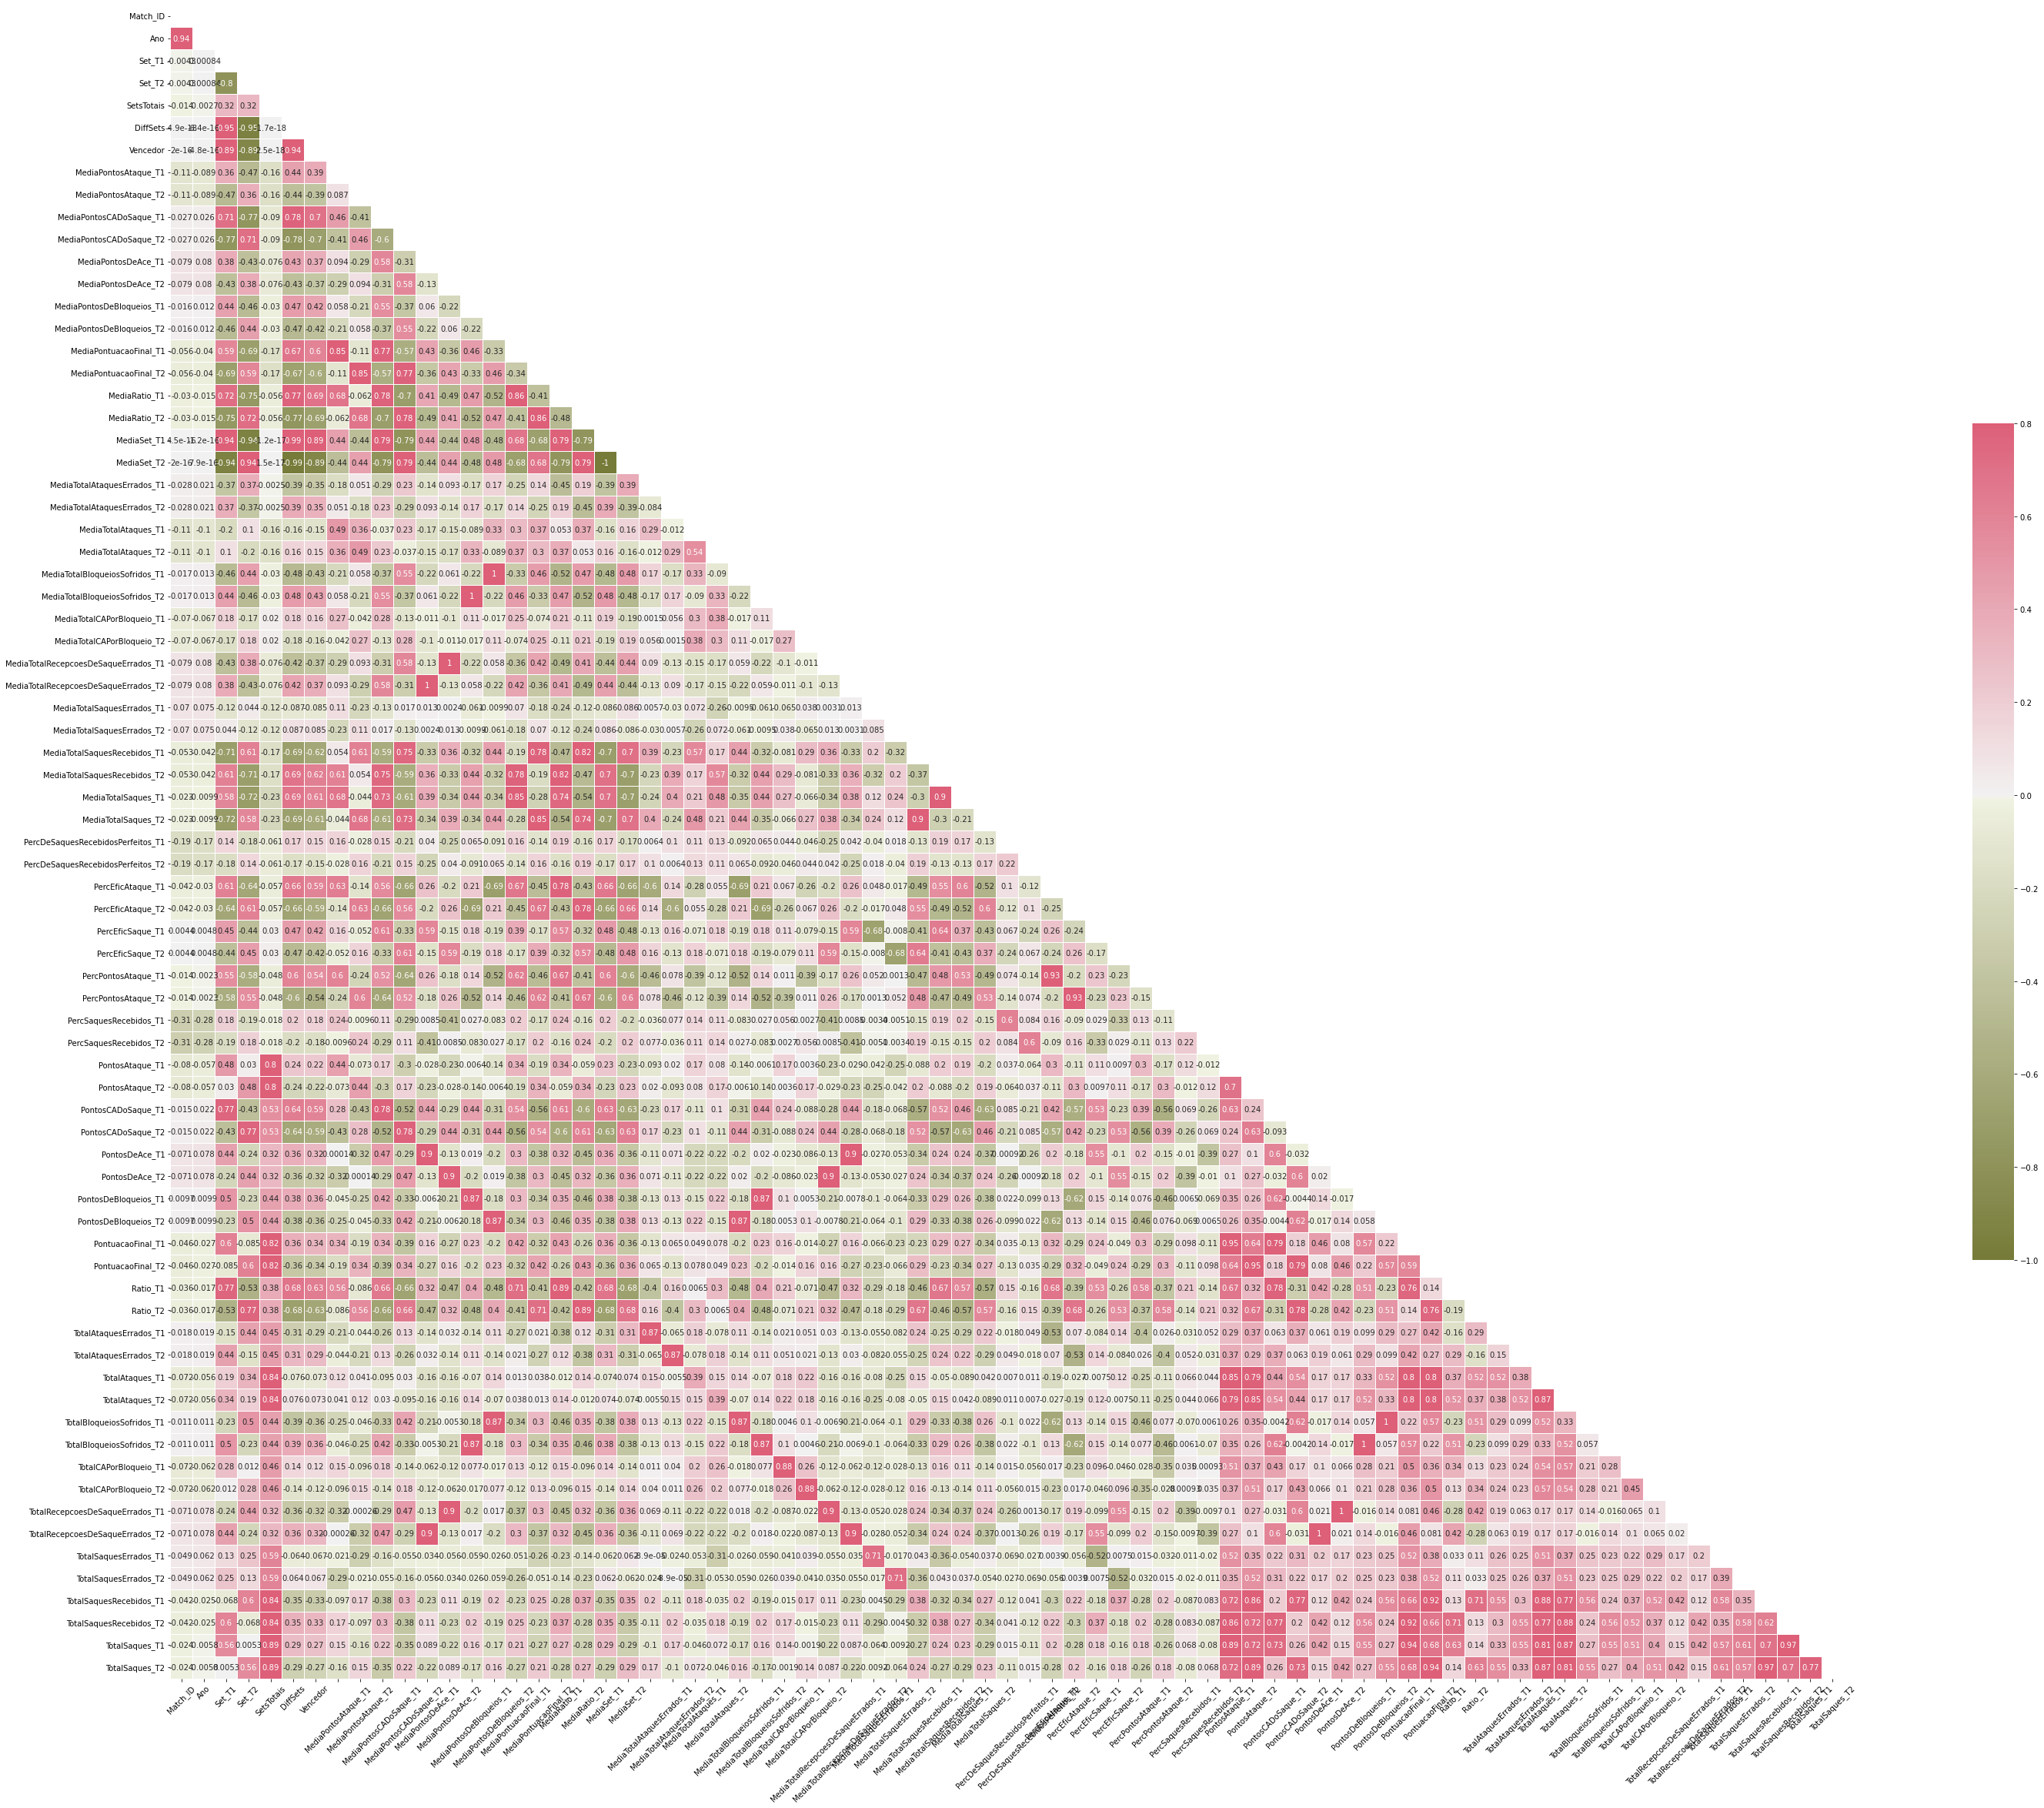

In [165]:
dados_correlacao = df.corr() 
 
mascara = np.zeros_like(dados_correlacao, dtype=float)
mascara[np.triu_indices_from(mascara)] = True
 
f, ax = plt.subplots(figsize=(60, 40))
cmap = sns.diverging_palette(90, 5, as_cmap=True)
sns.heatmap(dados_correlacao, mask=mascara, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
 
plt.show()

In [171]:
dados_correlacao.loc['MediaTotalSaquesRecebidos_T2', 'TotalSaques_T1']

0.23975501545375966

In [166]:
coeficiente_pearson = scipy.stats.pearsonr(df['PercEficAtaque_T1'], df['TotalSaques_T1'])[0]
print(f'Coeficiente de Pearson = {coeficiente_pearson}')

Coeficiente de Pearson = 0.19913266789573658


In [179]:
df_times = df.groupby(['Time', 'Ano']).mean()
df_times.sort_values('DiffSets', ascending=False).head()

Match_ID    Set_T1    Set_T2  SetsTotais  \
Time                   Ano                                                
ZAKSA Kędzierzyn-Koźle 2020   52.266667  3.000000  0.600000    3.600000   
Projekt Warszawa       2023  598.500000  3.000000  0.750000    3.750000   
ZAKSA Kędzierzyn-Koźle 2021  201.580645  2.645161  0.935484    3.580645   
Jastrzębski Węgiel     2021  197.548387  2.612903  1.064516    3.677419   
                       2020   55.571429  2.714286  1.214286    3.928571   

                             DiffSets  Vencedor  MediaPontosAtaque_T1  \
Time                   Ano                                              
ZAKSA Kędzierzyn-Koźle 2020  2.400000  1.000000             13.614444   
Projekt Warszawa       2023  2.250000  1.000000             13.441667   
ZAKSA Kędzierzyn-Koźle 2021  1.709677  0.806452             13.333871   
Jastrzębski Węgiel     2021  1.548387  0.774194             13.584946   
                       2020  1.500000  0.857143             13.097619   

                             MediaPontosAtaque_T2  MediaPontosCADoSaque_T1  \
Time                   Ano                                                   
ZAKSA Kędzierzyn-Koźle 2020             11.817778                 7.067778   
Projekt Warszawa       2023             11.295833                 6.897917   
ZAKSA Kędzierzyn-Koźle 2021             11.891398                 7.151075   
Jastrzębski Węgiel     2021             12.053226                 6.758065   
                       2020             11.266667                 6.844048   

                             MediaPontosCADoSaque_T2  MediaPontosDeAce_T1  \
Time                   Ano                                                  
ZAKSA Kędzierzyn-Koźle 2020                 3.931111             1.485556   
Projekt Warszawa       2023                 4.016667             1.608333   
ZAKSA Kędzierzyn-Koźle 2021                 4.225806             1.683871   
Jastrzębski Węgiel     2021                 4.589785             1.638172   
                       2020                 4.242857             2.173810   

                             MediaPontosDeAce_T2  MediaPontosDeBloqueios_T1  \
Time                   Ano                                                    
ZAKSA Kędzierzyn-Koźle 2020             1.164444                   2.733333   
Projekt Warszawa       2023             1.314583                   2.775000   
ZAKSA Kędzierzyn-Koźle 2021             1.257527                   2.652688   
Jastrzębski Węgiel     2021             1.037097                   2.395161   
                       2020             1.126190                   2.003571   

                             MediaPontosDeBloqueios_T2  \
Time                   Ano                               
ZAKSA Kędzierzyn-Koźle 2020                   1.540000   
Projekt Warszawa       2023                   1.293750   
ZAKSA Kędzierzyn-Koźle 2021                   1.575269   
Jastrzębski Węgiel     2021                   1.919892   
                       2020                   1.689286   

                             MediaPontuacaoFinal_T1  MediaPontuacaoFinal_T2  \
Time                   Ano                                                    
ZAKSA Kędzierzyn-Koźle 2020               17.833333               14.522222   
Projekt Warszawa       2023               17.825000               13.904167   
ZAKSA Kędzierzyn-Koźle 2021               17.670430               14.724194   
Jastrzębski Węgiel     2021               17.618280               15.010215   
                       2020               17.275000               14.082143   

                             MediaRatio_T1  MediaRatio_T2  MediaSet_T1  \
Time                   Ano                                               
ZAKSA Kędzierzyn-Koźle 2020      10.094444       4.135556     0.856667   
Projekt Warszawa       2023       9.725000       5.083333     0.825000   
ZAKSA Kędzierzyn-Koźle 2021       9.300000       4.412903     0.774194   
Jastrzębski Węgiel   

## CONTAGEM DE VITÓRIAS POR TIME

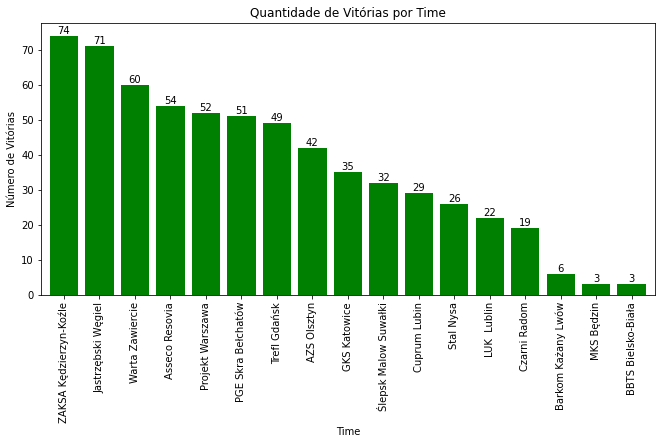

In [172]:
vitorias_por_time = df.groupby('Time')['Vencedor'].sum()
vitorias_por_time = vitorias_por_time.sort_values(ascending=False)

# Criar um gráfico de barras com rótulos de dados e largura ajustada
fig, ax = plt.subplots(figsize=(11, 5))  
vitorias_por_time.plot(kind='bar', color='green', ax=ax, width=0.8)  # Ajustar a largura das barras

# Adicionar rótulos de dados acima das barras
for i, v in enumerate(vitorias_por_time):
    ax.text(i, v + 0.1, str(v), color='black', ha='center', va='bottom')

# Configurar o título e os rótulos do eixo
plt.title('Quantidade de Vitórias por Time')
plt.xlabel('Time')
plt.ylabel('Número de Vitórias')

plt.show()

In [ ]:
# Criar coluna 'Resultado' com base na coluna 'Vencedor'
df['Resultado'] = np.where(df['Vencedor'] == 1, 'Vitória', 'Derrota')

# Contar o número de vitórias e derrotas por time
contagem_resultados = df.groupby(['Time', 'Resultado']).size().unstack(fill_value=0)

cores = {'Vitória': 'green', 'Derrota': 'red'}
# Criar o gráfico de barras empilhadas
contagem_resultados.plot(
    kind='bar', 
    stacked=True, 
    figsize=(11, 5), 
    color=[cores[col] for col in contagem_resultados.columns]
)

# Configurar o título e os rótulos dos eixos
plt.title('Número de Vitórias e Derrotas por Time')
plt.xlabel('Time')
plt.ylabel('Número de Partidas')

# Adicionar legenda
plt.legend(title='Resultado', loc='upper right')

plt.show()

In [ ]:
# Cria uma figura e um eixo para o gráfico
fig, ax = plt.subplots(figsize=(10, 5))

# Itera sobre as colunas do DataFrame original, exceto a coluna de vitórias
for col in df.filter(regex=(".*T1|.*T2")).columns:
    if col != 'Vencedor':
        # Calcula a média da coluna para cada time utilizando o groupby
        media_por_time = df.groupby('Time')[col].mean()
        
        # Faz o plot dos dados
        ax.scatter(vitorias_por_time, media_por_time, label=col)

# Define o título e os rótulos dos eixos
ax.set_title('Gráfico de Dispersão (Vitórias Por Time x Outras Variáveis)')
ax.set_xlabel('Vitórias Por Time')
ax.set_ylabel('Outras Variáveis')

# Adiciona a legenda
ax.legend()

# Exibe o gráfico
plt.show()

In [ ]:
MediaPontosCADoSaque_T1

### GRÁFICO DISPERSÃO RELAÇÃO ENTRE MÉDIA DE BLOQUEIO E VITÓRIAS POR TIME

In [ ]:
# Calcular o coeficiente de correlação
# coeficiente_pearson = scipy.stats.pearsonr(df_relacao['Media_Bloqueio'], df_relacao['Contagem_Vitorias'])[0]
# print(f'Coeficiente de Pearson = {coeficiente_pearson}')

```Uma correlação de 0.36 indica uma correlação positiva moderada entre as variáveis Media_Bloqueio e Contagem_Vitorias. Isso significa que, em média, à medida que a Media_Bloqueio aumenta, a Contagem_Vitorias também tende a aumentar, mas não de forma perfeita. A magnitude da correlação (0.36) sugere que a relação não é extremamente forte, mas ainda assim existe uma tendência positiva.```

### GRÁFICO DISPERSÃO RELAÇÃO ENTRE EFICIENCIA DO SAQUE E VITÓRIAS POR TIME

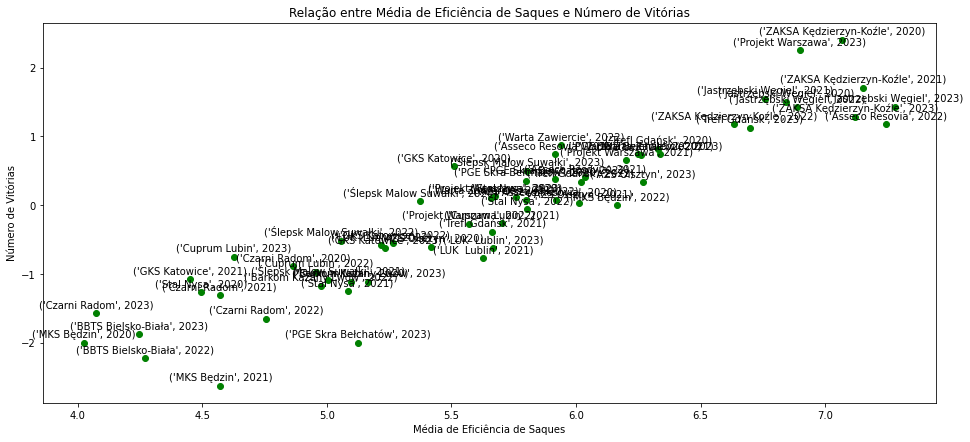

In [182]:
#Criar um gráfico de dispersão
plt.figure(figsize=(16, 7))
plt.scatter(df_times['MediaPontosCADoSaque_T1'], df_times['DiffSets'], color='green')

# Adicionar rótulos aos pontos
for i, nome_time in enumerate(df_times.index):
    plt.annotate(nome_time, (df_times['MediaPontosCADoSaque_T1'][i], df_times['DiffSets'][i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Configurar o título e os rótulos do eixo
plt.title('Relação entre Média de Eficiência de Saques e Número de Vitórias')
plt.xlabel('Média de Eficiência de Saques')
plt.ylabel('Número de Vitórias')

# Exibir o gráfico
plt.show()


In [205]:
fig = px.scatter(df_times.reset_index(), 
                 x='MediaPontosCADoSaque_T1', 
                 y='DiffSets', 
                 hover_data=['Time', 'Ano'])

fig.update_layout(title='Gráfico de Dispersão',
                  xaxis=dict(title='MediaPontosCADoSaque_T1'),
                  yaxis=dict(title='DiffSets'))

#pyo.plot(fig, filename='grafico_dispersao.html')
fig.show()

In [197]:
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.express as px

In [206]:
df.columns

Index(['Match_ID', 'Ano', 'Date', 'Time', 'Oponente', 'Set_T1', 'Set_T2',
       'SetsTotais', 'DiffSets', 'Vencedor', 'MediaPontosAtaque_T1',
       'MediaPontosAtaque_T2', 'MediaPontosCADoSaque_T1',
       'MediaPontosCADoSaque_T2', 'MediaPontosDeAce_T1', 'MediaPontosDeAce_T2',
       'MediaPontosDeBloqueios_T1', 'MediaPontosDeBloqueios_T2',
       'MediaPontuacaoFinal_T1', 'MediaPontuacaoFinal_T2', 'MediaRatio_T1',
       'MediaRatio_T2', 'MediaSet_T1', 'MediaSet_T2',
       'MediaTotalAtaquesErrados_T1', 'MediaTotalAtaquesErrados_T2',
       'MediaTotalAtaques_T1', 'MediaTotalAtaques_T2',
       'MediaTotalBloqueiosSofridos_T1', 'MediaTotalBloqueiosSofridos_T2',
       'MediaTotalCAPorBloqueio_T1', 'MediaTotalCAPorBloqueio_T2',
       'MediaTotalRecepcoesDeSaqueErrados_T1',
       'MediaTotalRecepcoesDeSaqueErrados_T2', 'MediaTotalSaquesErrados_T1',
       'MediaTotalSaquesErrados_T2', 'MediaTotalSaquesRecebidos_T1',
       'MediaTotalSaquesRecebidos_T2', 'MediaTotalSaques_T1',
   

In [252]:
df_reg = df.loc[df.Vencedor==1,['DiffSets', 
#     'MediaPontosAtaque_T1',
#     'MediaPontosAtaque_T2', 
                                
    'MediaPontosCADoSaque_T1',
    'MediaPontosCADoSaque_T2', 
                                
    'MediaPontosDeAce_T1', 
    'MediaPontosDeAce_T2',
    
    'MediaPontosDeBloqueios_T1',
       
    'MediaRatio_T1',
    'MediaRatio_T2', 
       
#     'MediaTotalAtaquesErrados_T1', 
#     'MediaTotalAtaquesErrados_T2',

#     'MediaTotalAtaques_T1', 
#     'MediaTotalAtaques_T2',

    'MediaTotalBloqueiosSofridos_T1',
                                
    'MediaTotalCAPorBloqueio_T1', 
    'MediaTotalCAPorBloqueio_T2',

    'MediaTotalSaquesErrados_T1',
    'MediaTotalSaquesErrados_T2', 

#     'MediaTotalSaques_T1',
#     'MediaTotalSaques_T2', 

#     'PercDeSaquesRecebidosPerfeitos_T1',
#     'PercDeSaquesRecebidosPerfeitos_T2', 

    'PercEficAtaque_T1',
    'PercEficAtaque_T2',

#     'PercEficSaque_T1', 
#     'PercEficSaque_T2',

#     'PercSaquesRecebidos_T1',
#     'PercSaquesRecebidos_T2',
       ]]
df_reg.head()

,DiffSets,MediaPontosCADoSaque_T1,MediaPontosCADoSaque_T2,MediaPontosDeAce_T1,MediaPontosDeAce_T2,MediaPontosDeBloqueios_T1,MediaRatio_T1,MediaRatio_T2,MediaTotalBloqueiosSofridos_T1,MediaTotalCAPorBloqueio_T1,MediaTotalCAPorBloqueio_T2,MediaTotalSaquesErrados_T1,MediaTotalSaquesErrados_T2,PercEficAtaque_T1,PercEficAtaque_T2
628,3,7.666667,2.00,2.333333,0.00,2.666667,10.666667,-0.333333,1.666667,2.333333,1.666667,3.333333,4.00,40,17
1,1,5.600000,5.40,1.600000,1.00,1.800000,6.200000,3.400000,1.400000,2.000000,3.400000,5.200000,5.00,43,34
630,2,5.000000,5.00,1.000000,1.00,1.750000,8.250000,7.500000,1.750000,2.750000,2.250000,5.000000,5.25,40,38
631,3,8.000000,4.00,1.666667,1.00,3.333333,12.333333,6.333333,2.000000,4.000000,1.666667,3.000000,3.00,37,28
632,2,6.500000,4.25,2.000000,1.25,2.250000,9.000000,4.250000,1.250000,3.500000,2.750000,2.250000,4.00,33,26


In [231]:
df[df.Vencedor==1].describe()

,Match_ID,Ano,Set_T1,Set_T2,SetsTotais,DiffSets,Vencedor,MediaPontosAtaque_T1,MediaPontosAtaque_T2,MediaPontosCADoSaque_T1,MediaPontosCADoSaque_T2,MediaPontosDeAce_T1,MediaPontosDeAce_T2,MediaPontosDeBloqueios_T1,MediaPontosDeBloqueios_T2,MediaPontuacaoFinal_T1,MediaPontuacaoFinal_T2,MediaRatio_T1,MediaRatio_T2,MediaSet_T1,MediaSet_T2,MediaTotalAtaquesErrados_T1,MediaTotalAtaquesErrados_T2,MediaTotalAtaques_T1,MediaTotalAtaques_T2,MediaTotalBloqueiosSofridos_T1,MediaTotalBloqueiosSofridos_T2,MediaTotalCAPorBloqueio_T1,MediaTotalCAPorBloqueio_T2,MediaTotalRecepcoesDeSaqueErrados_T1,MediaTotalRecepcoesDeSaqueErrados_T2,MediaTotalSaquesErrados_T1,MediaTotalSaquesErrados_T2,MediaTotalSaquesRecebidos_T1,MediaTotalSaquesRecebidos_T2,MediaTotalSaques_T1,MediaTotalSaques_T2,PercDeSaquesRecebidosPerfeitos_T1,PercDeSaquesRecebidosPerfeitos_T2,PercEficAtaque_T1,PercEficAtaque_T2,PercEficSaque_T1,PercEficSaque_T2,PercPontosAtaque_T1,PercPontosAtaque_T2,PercSaquesRecebidos_T1,PercSaquesRecebidos_T2,PontosAtaque_T1,PontosAtaque_T2,PontosCADoSaque_T1,PontosCADoSaque_T2,PontosDeAce_T1,PontosDeAce_T2,PontosDeBloqueios_T1,PontosDeBloqueios_T2,PontuacaoFinal_T1,PontuacaoFinal_T2,Ratio_T1,Ratio_T2,TotalAtaquesErrados_T1,TotalAtaquesErrados_T2,TotalAtaques_T1,TotalAtaques_T2,TotalBloqueiosSofridos_T1,TotalBloqueiosSofridos_T2,TotalCAPorBloqueio_T1,TotalCAPorBloqueio_T2,TotalRecepcoesDeSaqueErrados_T1,TotalRecepcoesDeSaqueErrados_T2,TotalSaquesErrados_T1,TotalSaquesErrados_T2,TotalSaquesRecebidos_T1,TotalSaquesRecebidos_T2,TotalSaques_T1,TotalSaques_T2
count,628.000000,628.000000,628.0,628.000000,628.000000,628.000000,628.0,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,313.500000,2021.450637,3.0,0.785032,3.785032,2.214968,1.0,13.349708,11.968923,6.964756,4.491534,1.688376,1.155016,2.489092,1.746444,17.527176,14.870382,9.249973,4.718259,0.825876,0.174124,1.451964,1.938323,24.921364,25.802203,1.745913,2.489411,2.631476,2.309687,1.155441,1.687951,4.010775,4.178981,16.974894,19.871762,23.884846,21.153052,21.574841,19.609873,40.550955,28.925159,-5.049363,-10.393312,53.404459,46.154459,48.022293,45.171975,50.020701,45.356688,25.716561,17.394904,6.213376,4.463376,9.248408,6.742038,65.482484,56.562102,33.909236,18.673567,5.593949,7.235669,94.109873,97.140127,6.740446,9.250000,9.890127,8.843949,4.463376,6.213376,15.101911,15.705414,64.538217,74.323248,89.425159,80.250000
std,181.432265,0.894311,0.0,0.782564,0.782564,0.782564,0.0,1.651439,1.602825,1.379747,1.156046,0.738984,0.602885,0.857619,0.720864,1.778902,1.768538,2.334370,2.422566,0.162894,0.162894,0.619876,0.689638,2.994023,3.004660,0.719446,0.857474,1.026830,0.994470,0.601810,0.739073,0.997086,0.980815,1.946788,1.699326,1.644862,1.890875,6.931826,5.958578,8.130452,7.822134,5.608360,5.968799,5.926351,5.429263,8.101597,7.909116,9.512078,11.116040,4.576402,6.651985,2.610068,2.599275,3.214612,3.320760,10.514121,14.263446,7.203781,11.006311,2.805627,2.650004,21.103127,20.374080,3.317032,3.215232,4.195657,4.304352,2.595591,2.612511,4.557882,4.464373,15.995618,11.849493,14.057837,18.446083
min,0.000000,2020.000000,3.0,0.000000,3.000000,1.000000,1.0,8.600000,7.666667,3.200000,0.666667,0.000000,0.000000,0.333333,0.000000,12.400000,10.000000,2.200000,-3.333333,0.600000,0.000000,0.000000,0.333333,17.666667,17.600000,0.

In [253]:
# Define as variáveis independentes e a variável dependente (saída)
X = df_reg.loc[:, df_reg.columns != 'DiffSets']
y = df_reg['DiffSets']

# Separa os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Cria o modelo de regressão linear
reg_model = LinearRegression()

# Treina o modelo com dados de treinamento
reg_model.fit(X_train, y_train)

# Testa o modelo com dados de teste
y_pred = reg_model.predict(X_test)

# Avalia o modelo com métricas de desempenho
score = reg_model.score(X_test, y_test)

print(f'Coeficientes das variáveis independentes: {reg_model.coef_}')
print(f'Intercepto da reta: {reg_model.intercept_}')
print(f'R² do modelo: {score}') # Quanto mais proximo de 1, mais ele consegue predizer as coisas.

Coeficientes das variáveis independentes: [-0.11027916  0.02002365 -0.19514062  0.43308307 -0.2622488   0.46705498
 -0.19713648  0.27342376 -0.03928295 -0.01672355  0.24066832  0.24056597
 -0.02454573 -0.01296043]
Intercepto da reta: -0.9629613044921279
R² do modelo: 0.6754511425714348


In [254]:
coeficientes = list(reg_model.coef_)
colunas = list(X.columns)

# Ordena as colunas em ordem decrescente de coeficiente
colunas, coeficientes = zip(*sorted(zip(colunas, coeficientes), key=lambda x: x[1], reverse=True))

# Cria o gráfico de barras ordenado
bar_chart = go.Bar(x=colunas, y=coeficientes)

layout = go.Layout(title='Coeficientes das variáveis independentes')

fig = go.Figure(data=[bar_chart], layout=layout)

fig.show()

In [249]:
df_reg_times = df_times[['DiffSets', 
#     'MediaPontosAtaque_T1',
#     'MediaPontosAtaque_T2', 
                                
    'MediaPontosCADoSaque_T1',
    'MediaPontosCADoSaque_T2', 
                                
    'MediaPontosDeAce_T1', 
    'MediaPontosDeAce_T2',
    
    'MediaPontosDeBloqueios_T1',
       
    'MediaRatio_T1',
    'MediaRatio_T2', 
       
#     'MediaTotalAtaquesErrados_T1', 
#     'MediaTotalAtaquesErrados_T2',

#     'MediaTotalAtaques_T1', 
#     'MediaTotalAtaques_T2',

    'MediaTotalBloqueiosSofridos_T1',
                                
    'MediaTotalCAPorBloqueio_T1', 
    'MediaTotalCAPorBloqueio_T2',

    'MediaTotalSaquesErrados_T1',
    'MediaTotalSaquesErrados_T2', 

#     'MediaTotalSaques_T1',
#     'MediaTotalSaques_T2', 

#     'PercDeSaquesRecebidosPerfeitos_T1',
#     'PercDeSaquesRecebidosPerfeitos_T2', 

    'PercEficAtaque_T1',
    'PercEficAtaque_T2',

#     'PercEficSaque_T1', 
#     'PercEficSaque_T2',

#     'PercSaquesRecebidos_T1',
#     'PercSaquesRecebidos_T2',
       ]]
df_reg_times.head()

DiffSets  MediaPontosCADoSaque_T1  \
Time           Ano                                       
AZS Olsztyn    2020 -0.600000                 5.417778   
               2021  0.040000                 6.014000   
               2022  0.083333                 5.800000   
               2023  0.333333                 6.268519   
Asseco Resovia 2020  0.071429                 5.921429   

                     MediaPontosCADoSaque_T2  MediaPontosDeAce_T1  \
Time           Ano                                                  
AZS Olsztyn    2020                 5.636667             1.351111   
               2021                 5.524667             1.484000   
               2022                 5.575463             1.573148   
               2023                 5.111111             1.907407   
Asseco Resovia 2020                 5.595238             1.664286   

                     MediaPontosDeAce_T2  MediaPontosDeBloqueios_T1  \
Time           Ano                                                    
AZS Olsztyn    2020             1.073333                   1.872222   
               2021             1.226667                   2.240000   
               2022             1.484722                   1.956019   
               2023             0.972222                   2.166667   
Asseco Resovia 2020             1.510714                   1.498810   

                     MediaRatio_T1  MediaRatio_T2  \
Time           Ano                                  
AZS Olsztyn    2020       6.816667       7.375556   
               2021       7.657333       6.741333   
               2022       6.877315       6.201389   
               2023       8.953704       6.500000   
Asseco Resovia 2020       7.013095       7.358333   

                     MediaTotalBloqueiosSofridos_T1  \
Time           Ano                                    
AZS Olsztyn    2020                        2.021111   
               2021                        1.748000   
               2022                        1.876389   
               2023                        1.953704   
Asseco Resovia 2020                        2.275000   

                     MediaTotalCAPorBloqueio_T1  MediaTotalCAPorBloqueio_T2  \
Time           Ano                                                            
AZS Olsztyn    2020                    2.631111                    2.688889   
               2021                    2.460000                    2.486000   
               2022                    2.532870                    2.030556   
               2023                    2.648148                    2.888889   
Asseco Resovia 2020                    2.873810                    2.601190   

                     MediaTotalSaquesErrados_T1  MediaTotalSaquesErrados_T2  \
Time           Ano                                                            
AZS Olsztyn    2020                    4.527778                    3.820000   
               2021                    4.184000                    3.913333   
               2022                    4.257870                    4.313426   
               2023                    4.796296                    4.000000   
Asseco Resovia 2020                    4.014286                    3.946429   

                     PercEficAtaque_T1  PercEficAtaque_T2  
Time           Ano                                         
AZS Olsztyn    2020          34.466667          37.733333  
               2021          35.320000          33.920000  
               2022          37.166667          34.777778  
               2023          35.555556          32.222222  
Asseco Resovia 2020          35.214286          36.714286

In [260]:
# Define as variáveis independentes e a variável dependente (saída)
X = df_reg_times.loc[:, df_reg_times.columns != 'DiffSets']
#X = df_reg_times[['MediaPontosCADoSaque_T1']]
y = df_reg_times['DiffSets']

# Separa os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Cria o modelo de regressão linear
reg_model_times = LinearRegression()

# Treina o modelo com dados de treinamento
reg_model_times.fit(X_train, y_train)

# Testa o modelo com dados de teste
y_pred = reg_model_times.predict(X_test)

# Avalia o modelo com métricas de desempenho
score_times = reg_model_times.score(X_test, y_test)

print(f'Coeficientes das variáveis independentes: {reg_model_times.coef_}')
print(f'Intercepto da reta: {reg_model_times.intercept_}')
print(f'R² do modelo: {score_times}') # Quanto mais proximo de 1, mais ele consegue predizer as coisas.

Coeficientes das variáveis independentes: [-0.13275061 -0.23305468  0.73354954  0.04435681  0.23023553  0.32557603
 -0.06670394  0.42660674  0.00447331 -0.10637513 -0.20856836 -0.09112919
  0.04573012 -0.0522153 ]
Intercepto da reta: -0.5022556347034808
R² do modelo: 0.8827916969181724


In [266]:
# Separa a variável independente desejada e a variável dependente
x_var = 'MediaPontosCADoSaque_T1'
y_var = 'DiffSets'
x = df_reg_times[x_var]
y = df_reg_times[y_var]

# Prevê os valores de y (saída) a partir dos valores de x (entrada)
y_pred = reg_model_times.predict(X)

# Cria um objeto scatter com os pontos do gráfico
scatter = go.Scatter(x=x, y=y, mode='markers', name='Ponto')

# Cria um objeto scatter com a reta de regressão
line = go.Scatter(x=x, y=y_pred, mode='markers', name='Reta de Regressão')

# Cria um objeto layout para o gráfico
layout = go.Layout(title=f'Reta de regressão de {x_var} em função de {y_var}',
                   xaxis=dict(title=x_var),
                   yaxis=dict(title=y_var))

# Cria o objeto figure com os objetos scatter e layout
fig = go.Figure(data=[scatter, line], layout=layout)

# Plota o gráfico
fig.show()

In [265]:
line

Scatter({
    'mode': 'lines',
    'name': 'Reta de Regressão',
    'x': array([5.41777778, 6.014     , 5.8       , 6.26851852, 5.92142857, 6.03505747,
                7.24607843, 5.91458333, 4.27222222, 4.24583333, 4.97777778, 5.16666667,
                5.09537037, 5.70217391, 4.95677083, 4.62708333, 4.86388889, 4.57028986,
                4.75752688, 4.07380952, 5.51190476, 4.45      , 5.26666667, 5.23541667,
                6.84404762, 6.75806452, 6.88875   , 7.28095238, 5.62692308, 5.21868687,
                5.66666667, 4.02407407, 4.57291667, 6.16666667, 5.80119048, 6.26161616,
                5.91791667, 5.12619048, 5.67444444, 6.20208333, 5.57020202, 6.89791667,
                4.49555556, 5.08333333, 5.80454545, 5.76041667, 6.33039216, 5.66474359,
                6.01990741, 6.69791667, 6.24895833, 5.65802469, 5.94041667, 6.33541667,
                7.06777778, 7.15107527, 6.63375   , 7.11904762, 5.3754902 , 5.00333333,
                5.05707071, 5.80416667]),
    'y': array

In [251]:
coeficientes_times = list(reg_model_times.coef_)
colunas = list(X.columns)

# Ordena as colunas em ordem decrescente de coeficiente
colunas, coeficientes_times = zip(*sorted(zip(colunas, coeficientes_times), key=lambda x: x[1], reverse=True))

# Cria o gráfico de barras ordenado
bar_chart = go.Bar(x=colunas, y=coeficientes_times)

layout = go.Layout(title='Coeficientes das variáveis independentes')

fig = go.Figure(data=[bar_chart], layout=layout)

fig.show()

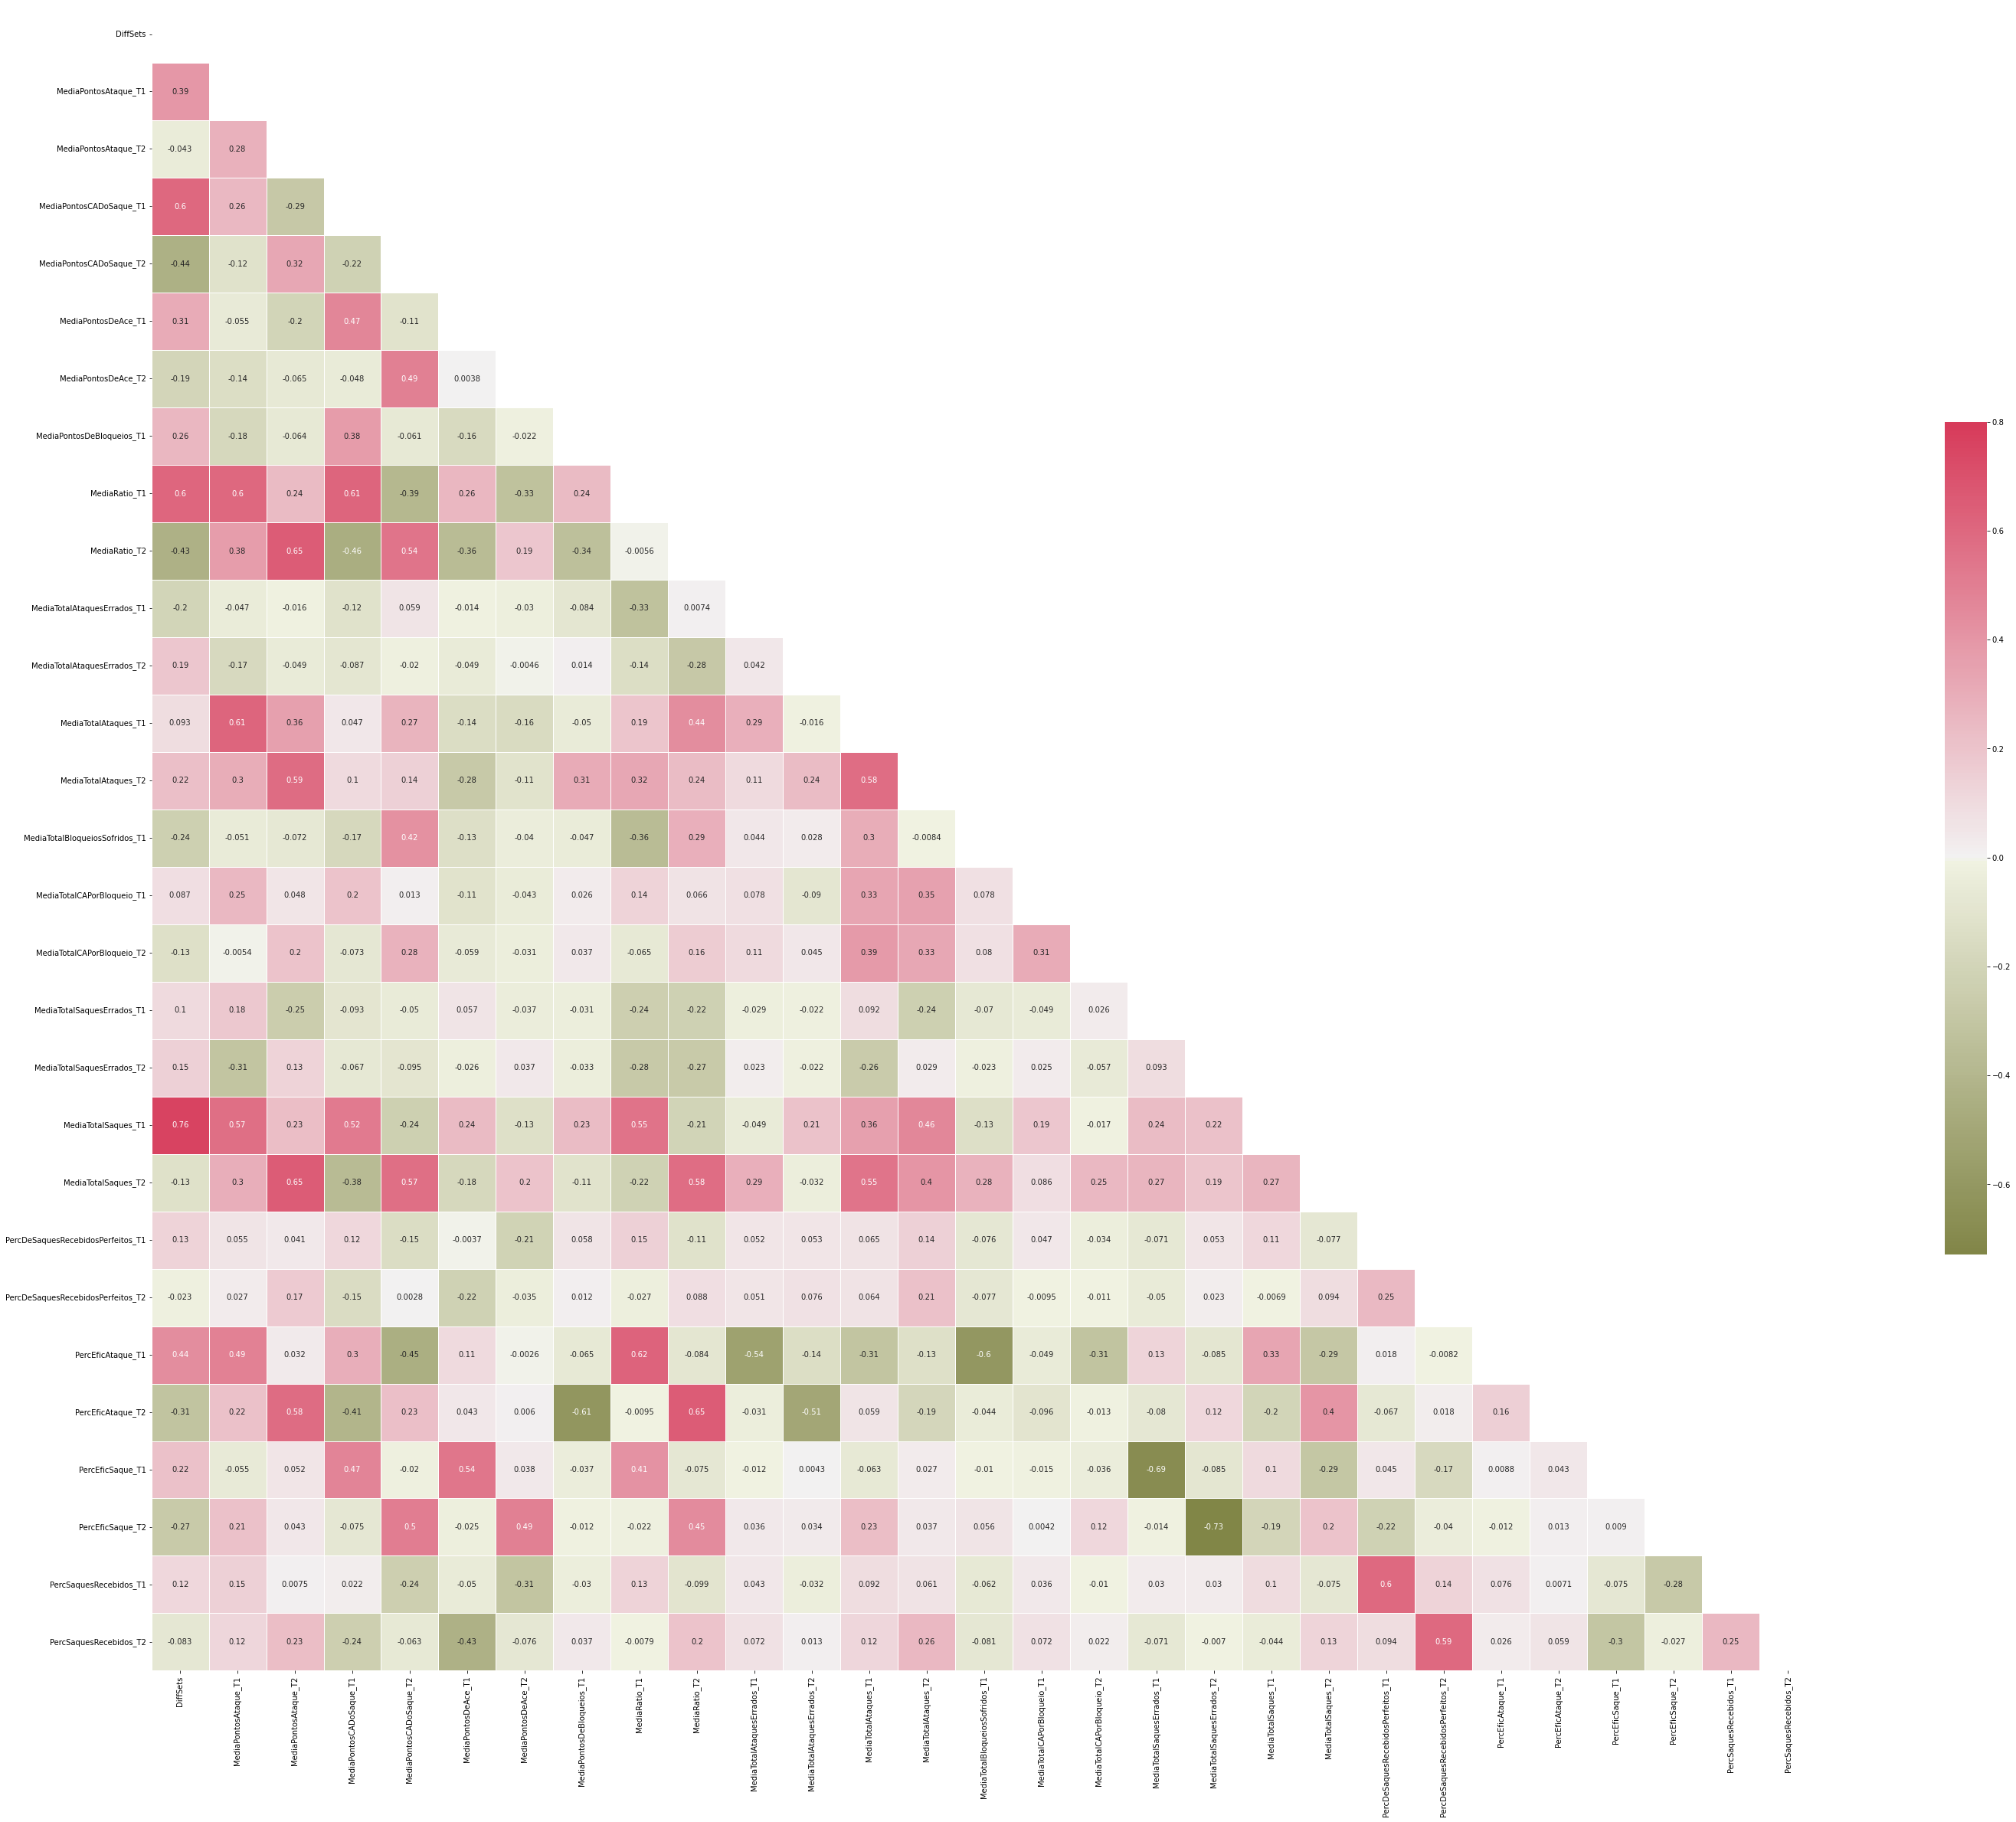

In [237]:
dados_correlacao_reg = df_reg.corr() 
 
mascara = np.zeros_like(dados_correlacao_reg, dtype=float)
mascara[np.triu_indices_from(mascara)] = True
 
f, ax = plt.subplots(figsize=(60, 40))
cmap = sns.diverging_palette(90, 5, as_cmap=True)
sns.heatmap(dados_correlacao_reg, mask=mascara, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
 
plt.show()

In [212]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Regressão nao apresentou necessariamente os mesmos resultados da correlação. 

In [ ]:
# # Calcular o coeficiente de correlação
# coeficiente_pearson_saque = scipy.stats.pearsonr(df_relacao_saque['Media_Saque'], df_relacao_saque['Contagem_Vitorias'])[0]
# print(f'Coeficiente de Pearson = {coeficiente_pearson_saque}')

```Ocoeficiente de correlação de Pearson é 0,8735802344182835. Esse valor é próximo de 1, o que indica uma correlação linear positiva forte entre as duas variáveis. Em outras palavras, as duas variáveis aumentam ou diminuem juntas.```